# CS 178 Homework 1

Problem 2.1 :

In [86]:
import numpy as np
import matplotlib.pyplot as plt
X = np.genfromtxt("iris.txt", delimiter=',', usecols=(0,1,2,3)) # load the feature values
Y = np.genfromtxt("iris.txt", delimiter=',', usecols=(4), dtype=str) # load the class labels
# convert the class labels to numeric seqeunce 0, 1, 2
for i, c in enumerate(np.unique(Y)):
    mask = np.where(Y==c)[0]
    Y[mask]=i
Y=Y.astype(int)
print("The number of features:")
print(X.shape[1])
print("The number of data points:")
print(X.shape[0])


The number of features:
4
The number of data points:
150


Problem 2.2: 

The graph below is a '4 x 4' plot gird of scatterplots of all dimension pairs.
For the same feature, plot the histogram of data values instead:


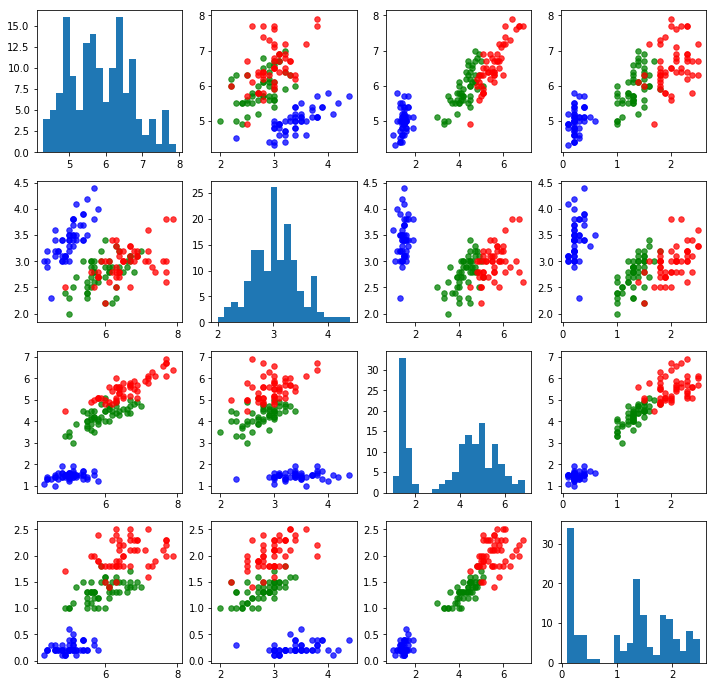

In [87]:
m, n = X.shape
ig, ax = plt.subplots(4, 4, figsize=(12, 12))
colors = ['b','g','r']
print("The graph below is a '4 x 4' plot gird of scatterplots of all dimension pairs.")
print("For the same feature, plot the histogram of data values instead:")
ax[0,0].hist(X[:,0], bins=20) #histogram of feature 0
ax[1,1].hist(X[:,1], bins=20) #histogram of feature 1
ax[2,2].hist(X[:,2], bins=20) #histogram of feature 2
ax[3,3].hist(X[:,3], bins=20) #histogram of feature 3
# feature 0 vs. feature 1
for c in range(3):
    mask=np.where(Y==c)[0]
    ax[0,1].scatter(X[mask,1], X[mask,0], s=30, c=colors[c], alpha=0.75)
# feature 0 va. feature 2
for c in range(3):
    mask=np.where(Y==c)[0]
    ax[0,2].scatter(X[mask,2], X[mask,0], s=30, c=colors[c], alpha=0.75)
# feature 0 va. feature 3
for c in range(3):
    mask=np.where(Y==c)[0]
    ax[0,3].scatter(X[mask,3], X[mask,0], s=30, c=colors[c], alpha=0.75)
# feature 1 vs. feature 0
for c in range(3):
    mask=np.where(Y==c)[0]
    ax[1,0].scatter(X[mask,0], X[mask,1], s=30, c=colors[c], alpha=0.75)
# feature 1 vs. feature 2
for c in range(3):
    mask=np.where(Y==c)[0]
    ax[1,2].scatter(X[mask,2], X[mask,1], s=30, c=colors[c], alpha=0.75)
# feature 1 vs. feature 3
for c in range(3):
    mask=np.where(Y==c)[0]
    ax[1,3].scatter(X[mask,3], X[mask,1], s=30, c=colors[c], alpha=0.75)
# feature 2 vs. feature 0
for c in range(3):
    mask=np.where(Y==c)[0]
    ax[2,0].scatter(X[mask,0], X[mask,2], s=30, c=colors[c], alpha=0.75)
# feature 2 vs. feature 1
for c in range(3):
    mask=np.where(Y==c)[0]
    ax[2,1].scatter(X[mask,1], X[mask,2], s=30, c=colors[c], alpha=0.75)
# feature 2 vs. feature 3
for c in range(3):
    mask=np.where(Y==c)[0]
    ax[2,3].scatter(X[mask,3], X[mask,2], s=30, c=colors[c], alpha=0.75)
# feature 3 vs. feature 0
for c in range(3):
    mask=np.where(Y==c)[0]
    ax[3,0].scatter(X[mask,0], X[mask,3], s=30, c=colors[c], alpha=0.75)
# feature 3 vs. feature 1
for c in range(3):
    mask=np.where(Y==c)[0]
    ax[3,1].scatter(X[mask,1], X[mask,3], s=30, c=colors[c], alpha=0.75)
# feature 3 vs. feature 2
for c in range(3):
    mask=np.where(Y==c)[0]
    ax[3,2].scatter(X[mask,2], X[mask,3], s=30, c=colors[c], alpha=0.75)
plt.show()


Problem 2.3:

The below is a PCA graph with 2 components:


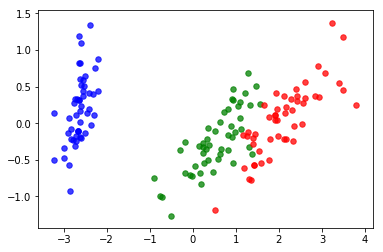

In [88]:
from sklearn.decomposition import PCA
import sklearn
from sklearn.linear_model import Perceptron
pca = PCA(n_components=2) # constructor
Xpca = pca.fit_transform(X) # PCA function to convert X into 2D feature space
colors=['b', 'g', 'r']
print("The below is a PCA graph with 2 components:")
for i, c in enumerate(np.unique(Y)):
    mask=np.where(Y==c)[0]
    plt.scatter(Xpca[mask,0], Xpca[mask,1], s=30, c=colors[i], alpha=0.75)
plt.show()

Problem 3.1:

In [20]:
import sklearn
from sklearn.linear_model import Perceptron
# Dataset classes according to 3.1
XA, YA = X[Y==0,:], Y[Y==0] # Dataset A: class 0
XB, YB = X[Y!=0,:], Y[Y!=0] # Dataset B: class 1 & 2 

YA[:]=0 # Class 0 as Class 0
YB[:]=1 # Class 1&2 as Class 1

Xtr = np.concatenate((XA,XB),axis=0)
Ytr = np.concatenate((YA,YB),axis=0)

# Create a sklearn perceptron classifier instance 
clf = Perceptron(random_state=0,tol=1e-3) 
clf.fit(Xtr,Ytr)
print("The mean accuracy (original space):")
print(clf.score(Xtr, Ytr))
print("The error rate: ")
print(1-clf.score(Xtr, Ytr))

The mean accuracy (original space):
1.0
The error rate: 
0.0


The below graph is a 2-dimenional PCA graph which separate 'Iris setosa'
(class0) from the other two species:


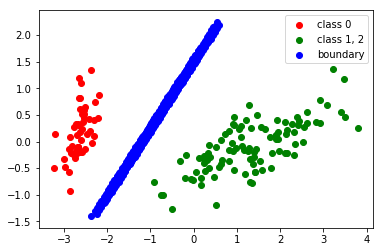

In [18]:
from sklearn.decomposition import PCA
import sklearn
from sklearn.linear_model import Perceptron
pca = PCA(n_components=2)
Xpca = pca.fit_transform(X)
# Plot the data in PCA space
# mask A: class 0; mask B: class 1 & 2
maskA, maskB = np.where(Y==0), np.where(Y!=0)
XApca = Xpca[maskA]
XBpca = Xpca[maskB]
plt.scatter(XApca[:,0], XApca[:,1], c='r', label="class 0") 
plt.scatter(XBpca[:,0], XBpca[:,1], c='g', label="class 1, 2")
# Plot the hyperplane in PCA space
interNum = 70
xx0 = np.linspace(X[:,0].min(), X[:,0].max(), interNum)
xx1 = np.linspace(X[:,1].min(), X[:,1].max(), interNum)
xx2 = np.linspace(X[:,2].min(), X[:,2].max(), interNum)
xx3 = np.linspace(X[:,3].min(), X[:,3].max(), interNum)
gridData = np.array(np.meshgrid(xx0, xx1, xx2, xx3)).T.reshape(-1,4)
gridPrediction = clf.decision_function(gridData)
# prediction hyperplane set
gridDataBound = gridData[np.abs(gridPrediction)<0.0000005, :]
gridDataBoundPCA = pca.transform(gridDataBound)
print("The below graph is a 2-dimenional PCA graph which separate 'Iris setosa'")
print("(class0) from the other two species:")
plt.scatter(gridDataBoundPCA[:,0], gridDataBoundPCA[:,1], c='b', label="boundary")
plt.legend()
plt.show()

Problem 3.2:

In [76]:
import sklearn
from sklearn.linear_model import Perceptron
# Dataset classes according to 3.1
XA, YA = X[Y==1,:], Y[Y==1] # Dataset A: class 1
XB, YB = X[Y==2,:], Y[Y==2] # Dataset B: class 2 

YA[50:]=0 # Class 1 as Class 0
YB[50:]=1 # Class 2 as Class 1

Xtr = np.concatenate((XA,XB),axis=0)
Ytr = np.concatenate((YA,YB),axis=0)

# Create a sklearn perceptron classifier instance 
clf = Perceptron(random_state=0) 
clf.fit(Xtr,Ytr)
print("The mean accuracy (original space):")
print(clf.score(Xtr, Ytr))
print("The error rate: ")
print(round(1-clf.score(Xtr, Ytr),3))

The mean accuracy (original space):
0.98
The error rate: 
0.02


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


The below graph is a 2-dimenional PCA graph which separate the other two species (class 1 & 2):


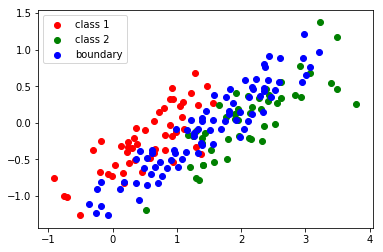

In [23]:
pca = PCA(n_components=2)
Xpca = pca.fit_transform(X)
# Plot the data in PCA space
# mask A: class 1; mask B: class 2
maskA, maskB = np.where(Y==1), np.where(Y==2)
XApca = Xpca[maskA]
XBpca = Xpca[maskB]
plt.scatter(XApca[:,0], XApca[:,1], c='r', label="class 1") 
plt.scatter(XBpca[:,0], XBpca[:,1], c='g', label="class 2")
# Plot the hyperplane in PCA space
interNum = 70
xx0 = np.linspace(X[50:,0].min(), X[50:,0].max(), interNum)
xx1 = np.linspace(X[50:,1].min(), X[50:,1].max(), interNum)
xx2 = np.linspace(X[50:,2].min(), X[50:,2].max(), interNum)
xx3 = np.linspace(X[50:,3].min(), X[50:,3].max(), interNum)
gridData = np.array(np.meshgrid(xx0, xx1, xx2, xx3)).T.reshape(-1,4)
gridPrediction = clf.decision_function(gridData)
# prediction hyperplane set
gridDataBound = gridData[np.abs(gridPrediction)<0.000000000000005, :]
gridDataBoundPCA = pca.transform(gridDataBound)
print("The below graph is a 2-dimenional PCA graph which separate the other two species (class 1 & 2):")
plt.scatter(gridDataBoundPCA[:,0], gridDataBoundPCA[:,1], c='b', label="boundary")
plt.legend()
plt.show()

Problem 4:

The numerical error rate is:
0.020000000000000018
The below graph shows that the separation plane in 2-dimensional PCA for iris data set:


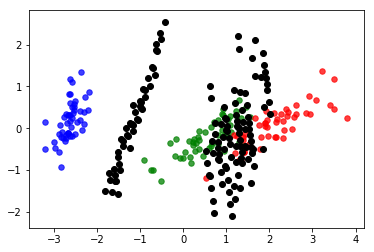

In [85]:
from sklearn.decomposition import PCA
import sklearn
from sklearn.linear_model import Perceptron
from sklearn.svm.libsvm import predict_proba
from sklearn import neighbors
pca = PCA(n_components=2) # constructor
Xpca = pca.fit_transform(X) # PCA function to convert X into 2D feature space
colors=['b', 'g', 'r']
for i, c in enumerate(np.unique(Y)):
    mask=np.where(Y==c)[0]           #mask is the list of index
    plt.scatter(Xpca[mask,0], Xpca[mask,1], s=30, c=colors[i], alpha=0.75) 
#scatter(x_dataposition, y_dataposition, s = scalar of array, alpha = 0-1:transparent-opaque);
interNum = 7
xx4 = np.linspace(X[:,0].min(), X[:,0].max(), interNum)
xx5 = np.linspace(X[:,1].min(), X[:,1].max(), interNum)
xx6 = np.linspace(X[:,2].min(), X[:,2].max(), interNum)
xx7 = np.linspace(X[:,3].min(), X[:,3].max(), interNum)
gridData = np.array(np.meshgrid(xx4, xx5, xx6, xx7)).T.reshape(-1,4)

clf = neighbors.KNeighborsClassifier(n_neighbors = 9)
clf.fit(X,Y)
print("The numerical error rate is:")
print(1-clf.score(X,Y))
arrPro = clf.predict_proba(gridData)
newGrid = []
for i, c in enumerate(arrPro):
    alist = c;
    alist.sort()
    if (alist[2] - alist[1]) < 0.12:
        newGrid.append(i)
newGridData = gridData[newGrid, :]
       
Xpca = pca.transform(newGridData)    
    
plt.scatter(Xpca[:,0],Xpca[:,1], c = 'black', label = "boundary")
print("The below graph shows that the separation plane in 2-dimensional PCA for iris data set:")
plt.show()



Problem 5:
When I am doing this homework, I search for same functions online. There are some useful websites such as "https://scikit-learn.org" which is a package of skikit learn. It's very useful in Python. TA inspires me alot during the discussion section. He gave us a detailed talk about how our homework 1 should look like. Also, I go to a study group with Jiaxiang Wang, Wanjing Zhang. On the problem 4, for the confidence function, I get ideas from Jiaxiang Wang. 